<a href="https://colab.research.google.com/github/SruthiSathya/Text-Classification-/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
import pandas as pd

tweet_data = files.upload()

Saving data_text.csv to data_text.csv


In [0]:
from google.colab import files 
import pandas as pd

tweet_data = files.upload()

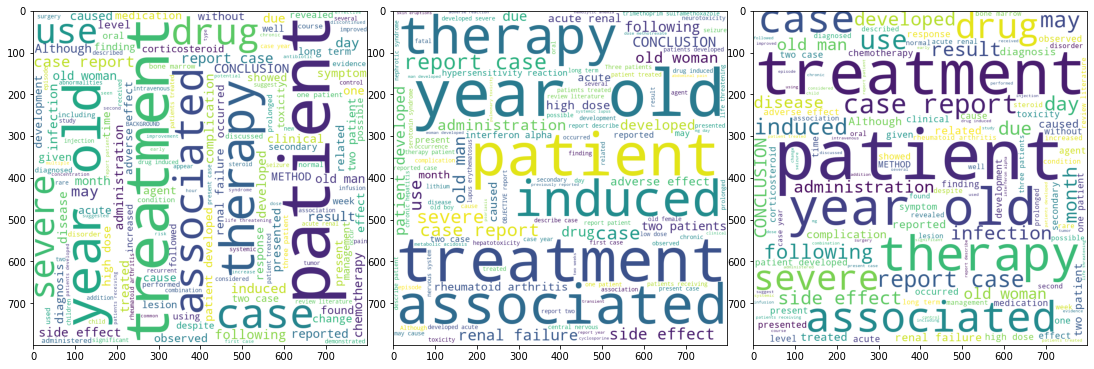

In [3]:
### let's start with checking words frequency in the given dataset. 
### This will give an insight of words having highest weightage and also, 
### help use in unsderstading if we need to retain or remove them.
### word frequency can be seen easily in form of WordCloud.

#Adding all the words from various rows in a single list
## all tweets
list_ = []
for i in range(0,len(tweet_data_df)):
    list_.append(tweet_data_df['tweets'][i])
reviews = "".join(list_)

## all tweets where lable = 1
list_1 = []
for i in range(0,len(tweet_data_df[tweet_data_df.label == 1])):
    list_1.append(tweet_data_df['tweets'][i])
reviews1 = "".join(list_1)


## all tweets where lable = 0
list_0 = []
for i in range(0,len(tweet_data_df[tweet_data_df.label == 0])):
    list_0.append(tweet_data_df['tweets'][i])
reviews0 = "".join(list_0)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
#word to WordCloud formation
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews) 

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews1)

wordcloud0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews0)

# plot the WordCloud image  
fig, ax = plt.subplots(1,3,figsize = (15, 5)) 
ax[0].imshow(wordcloud, cmap = 'Blues')  
plt.tight_layout(pad = 0)

ax[1].imshow(wordcloud1,cmap = 'afmhot') 
plt.tight_layout(pad = 0)

ax[2].imshow(wordcloud0,cmap = 'Oranges') 
plt.tight_layout(pad = 0)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

import string 
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
#nltk.download("popular")
import re
import pandas as pd 
# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
# models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
# vectorisation objects
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer



tweet_data_df = pd.read_csv("data_text.csv")
tweet_data_df.head(10)

stop_word = stopwords.words('english')
#print(set(stop_word))
#string.punctuation

# stopword
def clean_text(text):
#     1. # remove punctuations
    text_p = "".join([word for word in text if word not in string.punctuation]).lower()
#     2. # remove stopwords
    text_s = " ".join([word for word in text_p.split() if word not in stop_word])
#     3. # remove numbers
    text_n = re.sub(pattern = "[0-9]+", repl='', string=text_s)
#     4. # lammetization
    text_l = " ".join([nltk.PorterStemmer().stem(word) for word in text_n.split()])
#     5. # tokenization
    tokens = re.split('\W+', text_l)
    return tokens 


X_train, X_test, y_train, y_test = train_test_split(tweet_data_df.tweets, tweet_data_df.label, test_size = 0.2, stratify = tweet_data_df.label, random_state = 42)


for est in [RandomForestClassifier(random_state=42), MultinomialNB(), GradientBoostingClassifier()]:
    rf_pip = Pipeline(steps=[('vectorisation',CountVectorizer(analyzer=clean_text)),
                            ('estimator',est)])
    scores = cross_val_score(rf_pip,X_train,y_train, cv = 3, scoring= 'roc_auc')
    print(scores)
    print(np.average(scores))
    print(np.std(scores))



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt